## Problem 1

#### Part A

In [65]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from skimage import io
from PIL import Image, ImageDraw

In [2]:
def read_info(file_name):
    '''
    this function returns arrays with time, preassure and altitude data
    '''  
    data = pd.read_csv(file_name)
    time= np.array(data['Time (hh:mm:ss)'])
    altitude =  np.array(data['Altitude (meters)'])
    pressure = np.array(data['Pressure (pascals)'])
    
    return time,altitude,pressure

In [3]:
#calling the function:
time,altitude,press = read_info("weather-balloon-data.csv")
#print(time)

#### Part B

In [4]:
#recycled from stackoverflow
def convert_seconds(time_str): 
    '''
    this function covert time into secods
    '''
    h, m, s = time_str.split(':')
    return  int(h) * 3600 + int(m) * 60 + int(s) 

#### Part C

In [5]:
#looping over al time objects to convert into seconds:
for i in range (len(time)):
    time[i] = convert_seconds(time[i])  

#### Part D

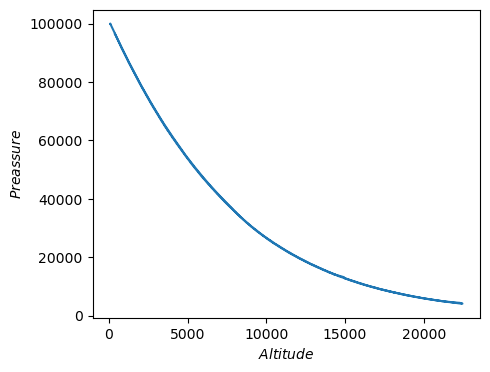

In [6]:
#Plotting:
plt.figure(figsize= (5,4))
plt.plot(altitude, press)
plt.xlabel(r"$Altitude$")
plt.ylabel(r"$Preassure$")
plt.show()

#### Part F

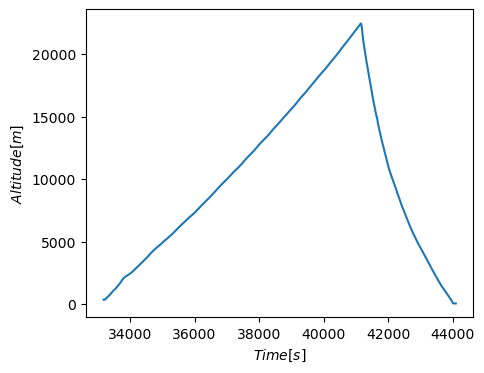

In [7]:
#Plotting:
plt.figure(figsize= (5,4))
plt.plot(time,altitude)
plt.xlabel(r"$Time[s]$")
plt.ylabel(r"$Altitude[m]$")
plt.show()

We can see that the balloon reacheas a pick altitude at about 41000-42000 seconds. The gorwth of the altitude is almost linear in time.

#### Part G

In [8]:
#Convert altitude into list to get index:
i = list(altitude).index(max(altitude))

#search fot the i object in tiem array:
time_h = time[i]

#print position, altitude value and time value
print("The maximun alttitude is" ,max(altitude),"meters")
print("The time is" , time_h)

The maximun alttitude is 22449 meters
The time is 41154


The balloon took  **41154 seconds** to reach an attitude of **22449 meters**

#### Part H

In [9]:
#Defining our delta: 
delta = altitude[77] - altitude[76]

#using gradient for verticla velocity
velocity = np.gradient(altitude, delta, axis=0)
acelaration  =  np.diff(velocity)

#### Part I

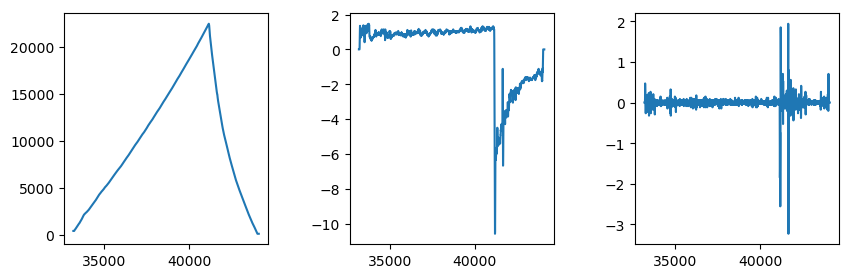

In [10]:
#Ploting:
fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(10,3))
im1 = ax1.plot(time,altitude)
im2 = ax2.plot(time,velocity)
im3 = ax3.plot(time[1:],acelaration)
    
#Adjusting the plots: 
plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()

## PROBLEM 2

#### Part A

In [11]:
def read_sunspot(file_name):
    '''
    this function returns arrays with month and susnspot data
    '''  
    data = pd.read_csv(file_name,sep="\t",header = None)
    time= np.array(data[0])
    sunspots =  np.array(data[1])
    
    return time,sunspots

#### Part B

In [12]:
#calling the function:
month,sunspot = read_sunspot("sunspots.txt")

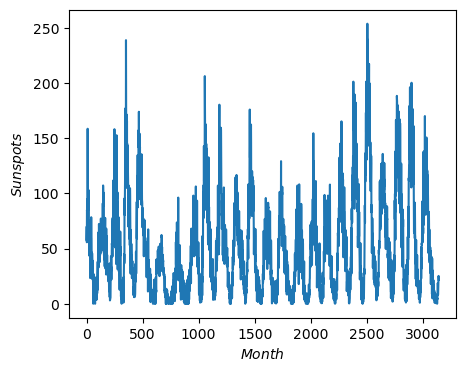

In [13]:
#Plotting:
plt.figure(figsize= (5,4))
plt.plot(month,sunspot)
plt.xlabel(r"$Month$")
plt.ylabel(r"$Sunspots$")
plt.show()

#### Part C

The plot seems to have a *periodic* behaviour. This migth be becuase of the **solar cycle**. As earth rotates over it's own axis so it does the sun. This means that the sunspots that we see depends on the solar rotation period. More over, Sun's light depends on the **proces of nuclear fusion**, this process might affect some how the production of this spots. Finally, if we convine the time it takes to ptoduce the solar spot plus the time of the solar cycle we might have a peroidic behavior as it seems on the plot.


#### Part D

In [14]:
#using scipy to count peaks:
from scipy.signal import find_peaks


#Defining the function:
def finding_peaks(month,sunspot): 
    '''
    this function returns arrays with month and susnspot data
    '''  
    peaks_position, _ = find_peaks(sunspot)
    sunspots_count = []
    
    #looping over the values:
    for i in range(len(peaks_position)):
        sunspots_count.append(sunspot[peaks_position[i]])
        
    #converting to array
    sunspots_count = np.array(sunspots_count)    
    
    # Creating data frame
    df = pd.DataFrame({"Month": peaks_position, "Sunspots count": sunspots_count})

    #Saving as csv file:
    df.to_csv("/home/jdiego/Documents/Computacional_1/output.csv", sep=',', float_format='{:.2e}'.format)
    
    return peaks_position,sunspots_count

#### Part E

In [15]:
#Calling the function:
peaks_position, count = finding_peaks(month,sunspot)

/tmp/ipykernel_58460/2577744616.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(peaks_position, count, "ro", color = 'red')


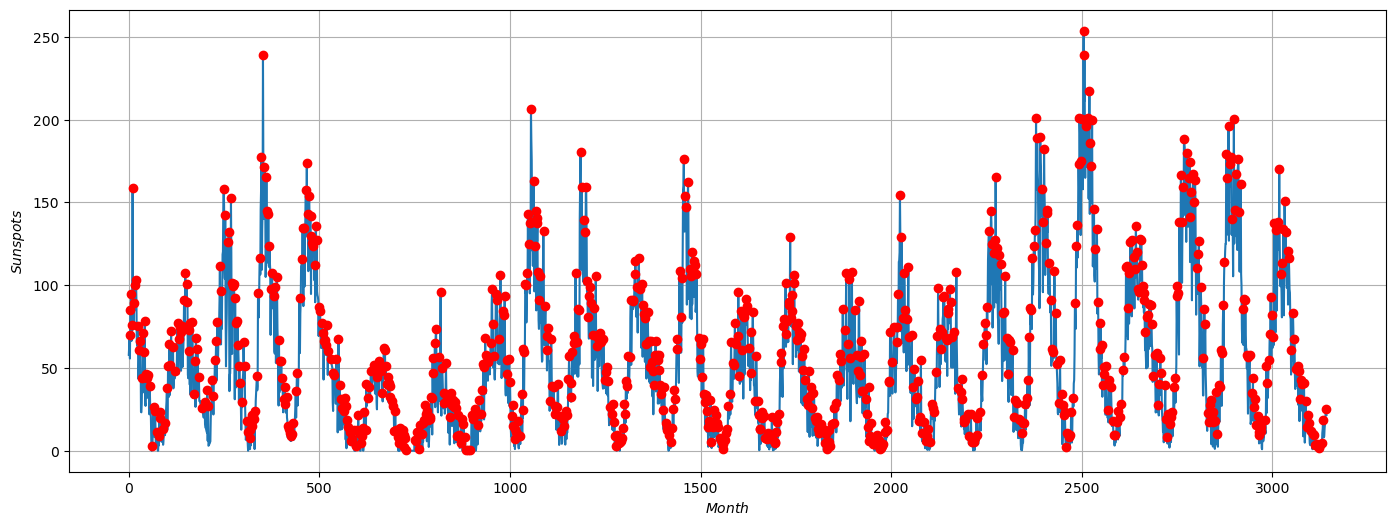

In [16]:
#Ploting:
plt.figure(figsize= (17,6))
plt.plot(month,sunspot)
plt.plot(peaks_position, count, "ro", color = 'red')
plt.xlabel(r"$Month$")
plt.ylabel(r"$Sunspots$")
plt.grid()
plt.show()

#### Part F

In [17]:
#we need to calcualte the difference between consecutive elemts of the array:
def distancia(peaks_position):
    '''
    this function returns arrays with month and susnspot data
    '''
    average=[]
    for i in range(len(peaks_position)-1):
        average.append(peaks_position[i+1]- peaks_position[i])
        
    #convert to array
    average = np.array(average)  
    
    #calculating average distance
    average = np.sum(average)/len(average)
    
    return average

In [18]:
#Calling the function: 
average_distance = distancia(peaks_position)

print("The stimated value for the solar cycle is" , average_distance)

The stimated value for the solar cycle is 3.385113268608414


#### Part G

In [19]:
def fourier_transform(sunspots):
    '''
    this function returns fourirer transfor and frequencies
    '''
    #Fourier transform:
    fourier = np.fft.fft(sunspots)
    F_norm = np.abs(fourier)
    # Calculate frequencies:
    freqs = np.fft.fftfreq(sunspots.size)
    
    return F_norm,freqs

#### Part H

In [20]:
#Calling the function 
fourier,freqs = fourier_transform(sunspot)

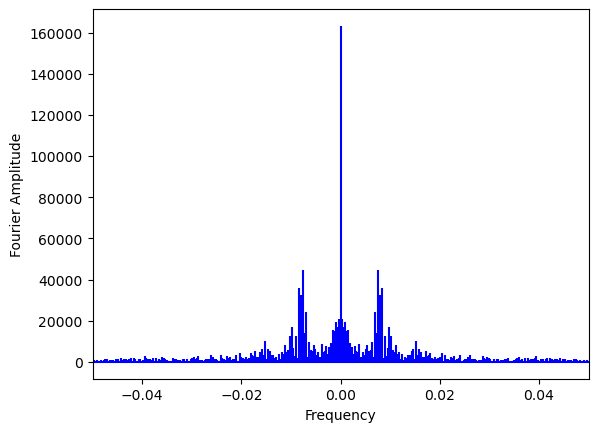

In [21]:
#Ploting
plt.figure()
plt.stem(freqs,fourier, 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency')
plt.ylabel('Fourier Amplitude')
plt.xlim(-0.05,0.05)
plt.show()

There are several values at nonzer ofrequency.The peaks might be becuase of recollected noise 

#### Part I 

In [22]:
#We want to exclude the zero freqnecy peak. Thus, we first have to find it.
index_1  = list(fourier).index(max(fourier))

#create a new list without the 0 freqeuncy: 
new_fourier = fourier[index_1 +1 : ]

#find the index of the highest frequency of nonzero frequencies: 
index_2 = list(fourier).index(max(new_fourier))

#calcualatin the frequency in months:
freq_month = 1/freqs[index_2]

#calcuting frenquency in years:
freq_years = freq_month/12

print('The calculated Solar cycle in month is', freq_month  ,'and in years it is' , freq_years )

The calculated Solar cycle in month is 130.95833333333334 and in years it is 10.913194444444445


This makes sense since the actual **solar cycle** is about **11 years**.

#### Part J

In [23]:
def filtering(fourier,freqs,freq_max):
    '''
    this function returns fourirer transfor and frequencies
    '''
    # Make a copy of the fourier
    filtered = fourier.copy()
    
    #filtering values differte from max frequencie
    filtered[np.abs(freqs) != freq_max] = 0
    
    #inverse 
    inv = np.fft.ifft(filtered)
    
    return inv

#### Part K

In [24]:
#Calling the function:
inverse_fourier = filtering(fourier,freqs,freqs[index_2])

/home/jdiego/anaconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


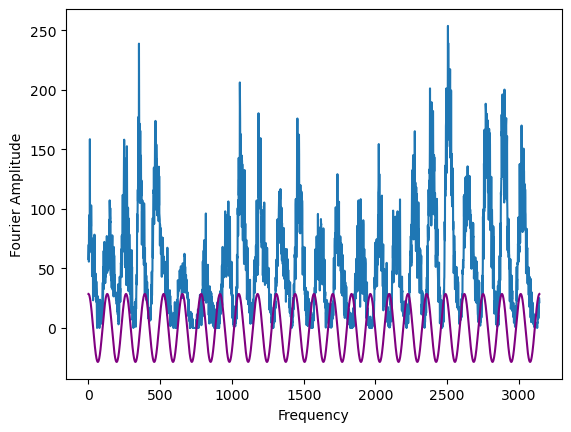

In [25]:
#Ploting
plt.figure()
plt.plot(month,sunspot)
plt.plot(month,inverse_fourier,color='purple')
plt.xlabel('Frequency')
plt.ylabel('Fourier Amplitude')
plt.show()

We get a cos signal. This might be due to that the sunspots depend on th magnetic flux. Thus we can see it as a equation of type **F = B *A* cos (y)**

## PROBLEM 3

#### Part A

In [26]:
def open_image(image_name):
    '''
    this function reads  the given image and plots one of the color layers 
    '''
    # Open the image:
    image = io.imread(image_name)
    
    #definign the layer: 
    imageR = image[:, :, 0]
    
    #Plotting
    fig, ax = plt.subplots()
    ax.imshow(imageR)
    plt.show()
    
    return np.array(imageR)

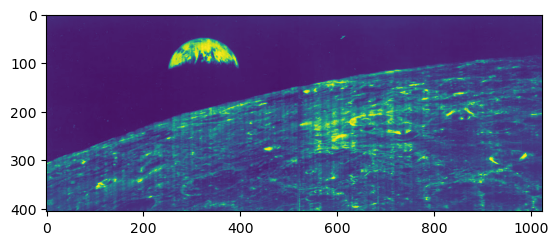

[[ 45  45  42 ...  33  36  41]
 [ 38  37  35 ...  33  36  41]
 [ 36  34  34 ...  33  36  40]
 ...
 [ 69  61  59 ... 119 118 115]
 [ 73  70  67 ...  86  78  77]
 [ 69  74  66 ...  79  81  83]]


In [98]:
#Calling the function: 
layer_array = open_image("First_View_of_Earth_from_Moon3.jpeg")

#layer array:
print(layer_array)

#### Part B

In the image we can see **distortion** in the resolution of the image.Also we can see **discoloration** in some areas of the image.

#### Part C

In [193]:
def fourier_transform(image):
    '''
    this function makes the fourier tranform of the image and plots it
    '''
    #image fourier transform: 
    fourier = np.fft.fft2(image)
    #shifted:
    shifted_fourier = np.fft.fftshift(fourier)
    
    # Method 1: Multi-panel figure
    plt.figure(figsize = (10,6))
    
    plt.subplot(2, 2, 1)
    plt.imshow(image)
    plt.title("Original image")

    plt.subplot(2, 2, 2)
    Z1 = plt.pcolor(np.log10(np.abs(shifted_fourier)), shading='auto', cmap ="viridis_r")
    plt.colorbar(Z1)
    plt.title("Fourier transform")

    plt.show()

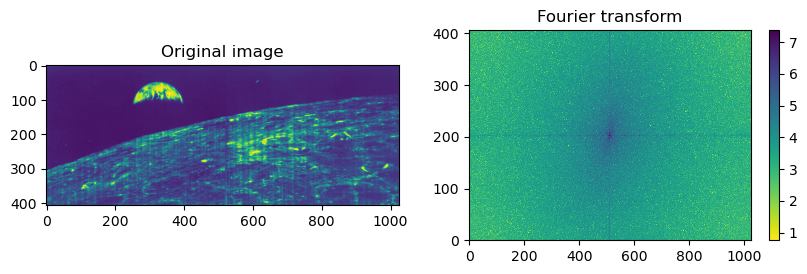

In [194]:
#calling the function:
fourier_transform(layer_array)

#### Part D

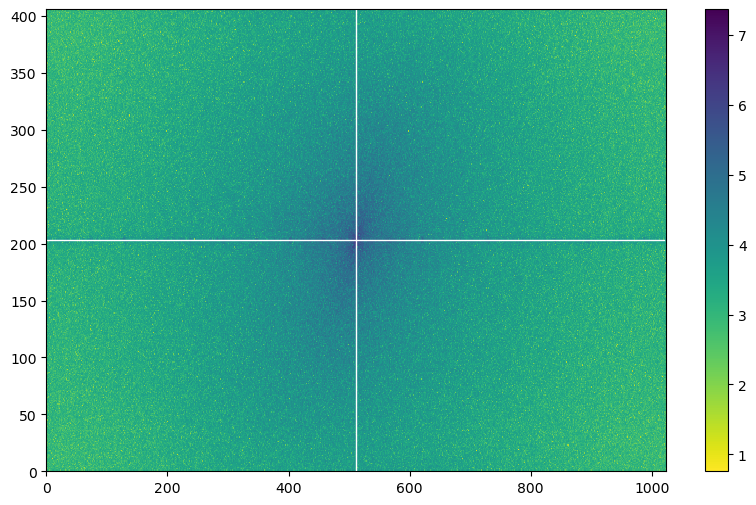

In [41]:
#image fourier transform: 
fourier = np.fft.fft2(layer_array)
#shifted:
shifted_fourier = np.fft.fftshift(fourier)

#hvertical center: 
image center =[ shifted_fourier.shape[0]//2 ,shifted_fourier.shape[1]//2]

#Plotting:
plt.figure(figsize = (10,6))
Z1 = plt.pcolor(np.log10(np.abs(shifted_fourier)), shading='auto', cmap ="viridis_r")
plt.colorbar(Z1)

#horizontal line 
plt.plot(x,y,color="white", linewidth=1)

#vertical line 
plt.plot(x1,y1,color="white", linewidth=1)
plt.show()

#### Part E 

In the imafe, the artefacst look like an horzontal and vertical lines

#### Part F

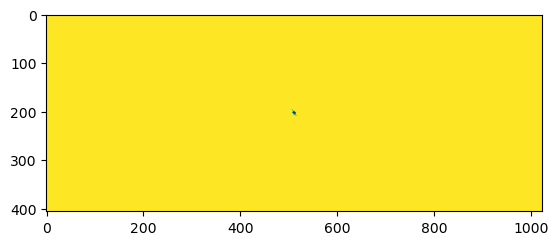

In [181]:
#creating the mask:
mask = np.ones_like(shifted_fourier)

#replacing:
mask1 = np.where(np.log10(np.abs(shifted_fourier)) <= 6, 1 ,0.00001) 

#Plotting:
plt.imshow(mask1)

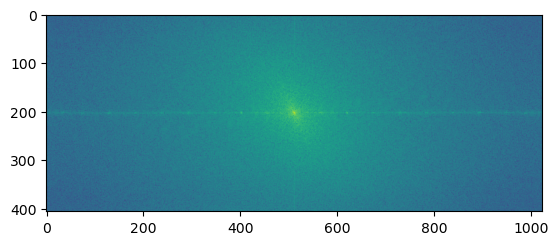

In [182]:
plt.imshow(np.log10(np.abs(shifted_fourier)))

#### Part G

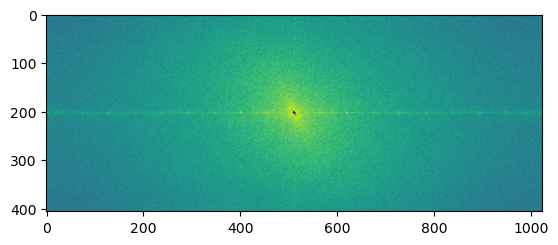

In [183]:
#Apply the mask to the shifted Fourier image
masked_shifted_fourier = shifted_fourier * mask1

#Plotting: 
plt.imshow(np.log10(np.abs(masked_shifted_fourier)))

#### Part H

In [189]:
def fourier_images_inverse (image, shifted_fourier): 
    '''
    This function plots the filterd image and the original
    '''
    plt.figure(figsize = (20,12))
    
    #Plotting: original image: 
    plt.subplot(2, 2, 1)
    X = plt.imshow(image)
    
    #Plotting: fourier image: 
    plt.subplot(2, 2, 2)
    Z1 = plt.imshow((shifted_fourier))
      
    plt.show()

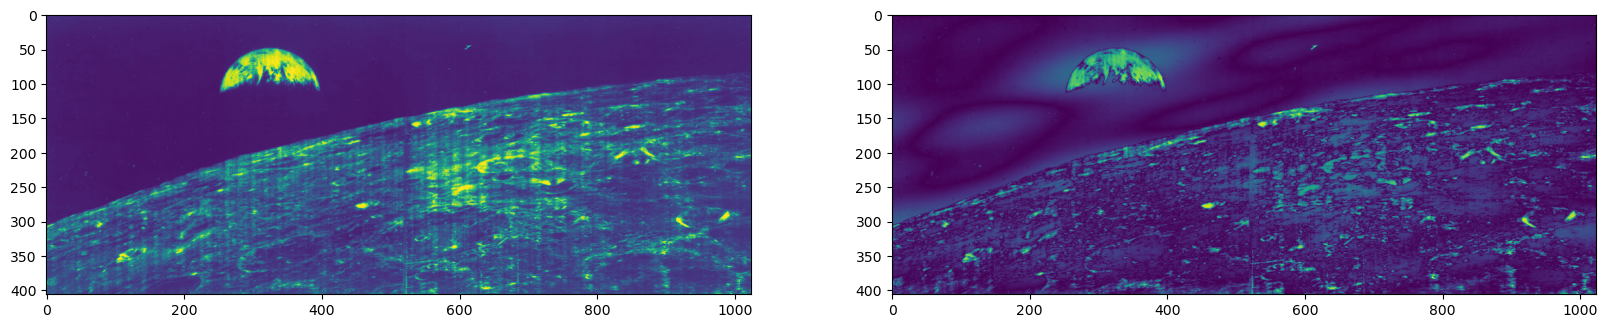

In [190]:
#inverse fourir transform the image:
masked_image = np.abs(np.fft.ifft2(np.fft.ifftshift(masked_shifted_fourier)))

#calling the function:
fourier_images_inverse(layer_array, masked_image)

#### Part I

In [195]:
def analisis(image_name,layer):
    '''
    This function makes the complete fourier anlysis
    '''
    # Open the image:
    image = io.imread(image_name)
    
    #definign the layer: 
    imageR = image[:, :, layer]
    
    #image fourier transform: 
    fourier = np.fft.fft2(imageR)
    
    #shifted:
    shifted_fourier = np.fft.fftshift(fourier)
    
    #creating the mask:
    mask = np.ones_like(shifted_fourier)

    #replacing:
    mask1 = np.where(np.log10(np.abs(shifted_fourier)) <= 6, 1 ,0.00001) 
    
    #Apply the mask to the shifted Fourier image
    masked_shifted_fourier = shifted_fourier * mask1
    
    #inverse fourir transform the image:
    masked_image = np.abs(np.fft.ifft2(np.fft.ifftshift(masked_shifted_fourier)))
    
    #Plotting: 
    plt.figure(figsize = (20,12))
    
    #Plotting: original image: 
    plt.subplot(2, 2, 1)
    X = plt.imshow(image)
    plt.title("Original image")
    
    #Plotting: fourier image: 
    plt.subplot(2, 2, 2)
    Z1 = plt.imshow((masked_image))
    plt.title("Fourier transform")
    
    plt.show()
    
    return masked_image

#### Part J 

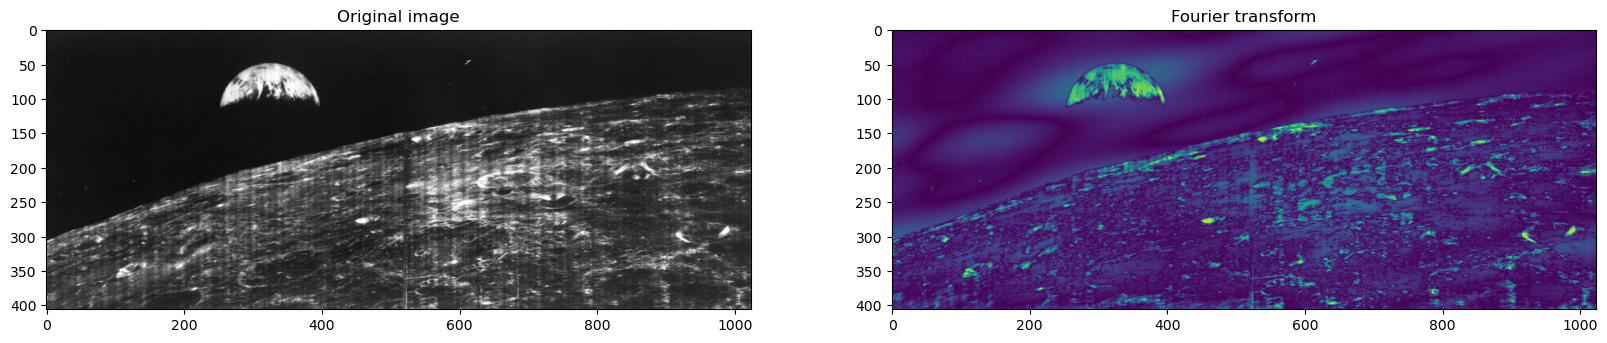

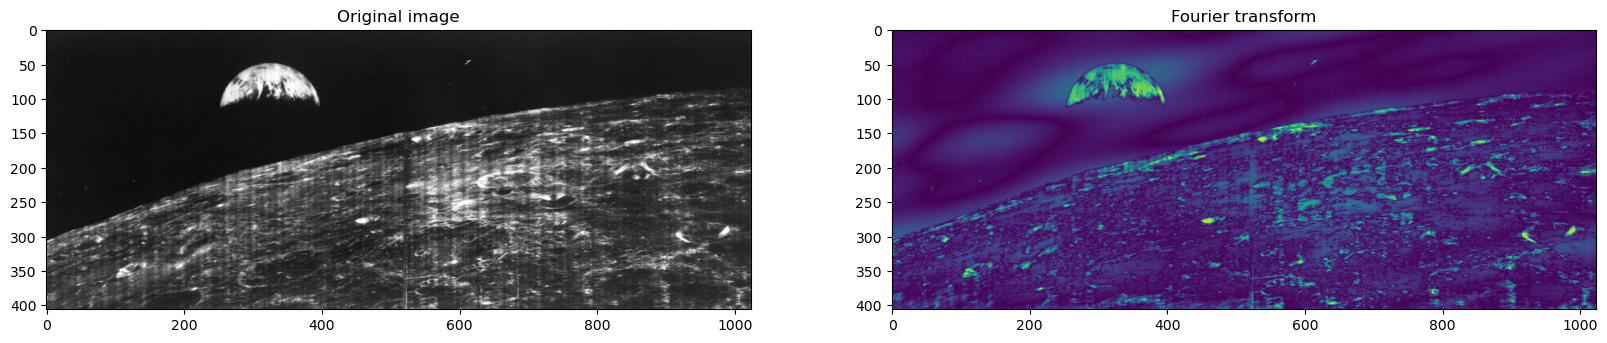

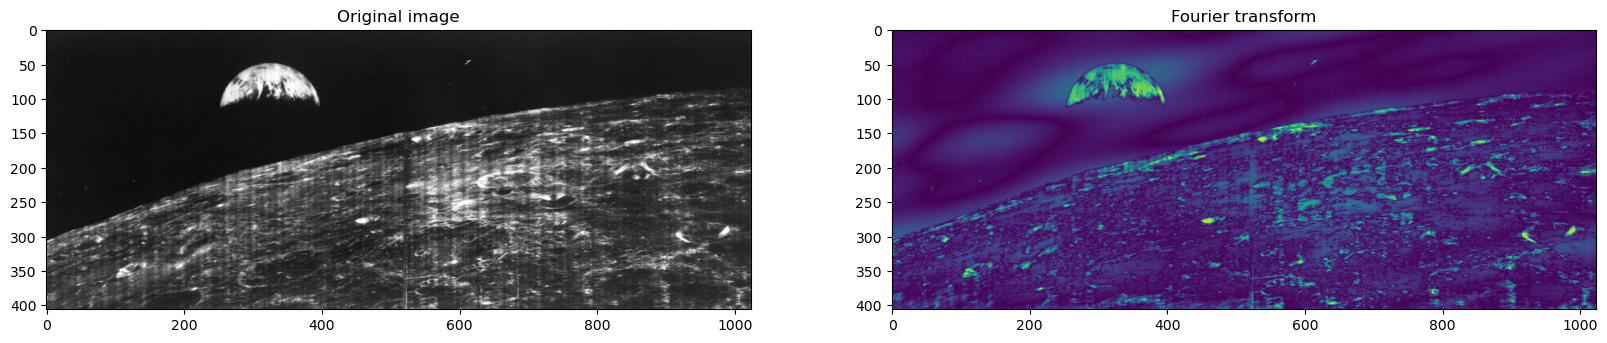

In [197]:
#image name as variable:
image_name = "First_View_of_Earth_from_Moon3.jpeg"

#calling function for each chanel:
masked_imageR = analisis(image_name,0)
masked_imageB = analisis(image_name,1)
masked_imageG = analisis(image_name,2)